In [ ]:
pip install numpy pandas scikit-learn transformers matplotlib flask


In [ ]:
import pandas as pd

def get_user_profile():
    user_data = {
        "Name": input("Enter your name: "),
        "Age": int(input("Enter your age: ")),
        "Gender": input("Enter your gender (M/F): "),
        "Height (cm)": float(input("Enter your height in cm: ")),
        "Weight (kg)": float(input("Enter your weight in kg: ")),
        "Activity Level (Sedentary/Moderate/Active)": input("Enter your activity level: "),
        "Health Conditions (if any)": input("Enter any known health conditions: ")
    }

    return pd.DataFrame([user_data])

# Sample user profile
user_profile = get_user_profile()
print(user_profile)


Enter your name: Fahad
Enter your age: 28
Enter your gender (M/F): M
Enter your height in cm: 180
Enter your weight in kg: 88
Enter your activity level: 5
Enter any known health conditions: N/A
    Name  Age Gender  Height (cm)  Weight (kg)  \
0  Fahad   28      M        180.0         88.0   

  Activity Level (Sedentary/Moderate/Active) Health Conditions (if any)  
0                                          5                        N/A  


In [ ]:
def recommend_fitness(user_profile):
    if user_profile["Activity Level (Sedentary/Moderate/Active)"].values[0] == "Sedentary":
        return "Recommend: Light exercises like walking, yoga, or stretching."
    elif user_profile["Activity Level (Sedentary/Moderate/Active)"].values[0] == "Moderate":
        return "Recommend: Moderate exercises like jogging, swimming, or cycling."
    else:
        return "Recommend: High-intensity exercises like running, weightlifting, or sports."

def recommend_diet(user_profile):
    weight = user_profile["Weight (kg)"].values[0]

    if weight < 60:
        return "Recommend: Balanced diet with protein-rich foods and fruits."
    elif weight < 80:
        return "Recommend: Include more veggies, lean proteins, and moderate carbs."
    else:
        return "Recommend: Focus on high-fiber foods, avoid sugars, and eat lean proteins."

# Generating recommendations based on user profile
fitness_recommendation = recommend_fitness(user_profile)
diet_recommendation = recommend_diet(user_profile)

print(f"Fitness Plan: {fitness_recommendation}")
print(f"Diet Plan: {diet_recommendation}")


Fitness Plan: Recommend: High-intensity exercises like running, weightlifting, or sports.
Diet Plan: Recommend: Focus on high-fiber foods, avoid sugars, and eat lean proteins.


In [ ]:
def update_user_metrics():
    steps = int(input("Enter the number of steps you walked today: "))
    calories_burned = int(input("Enter the calories burned today: "))
    water_intake = float(input("Enter the water intake in liters: "))

    return steps, calories_burned, water_intake

# Updating user profile with daily metrics
steps, calories, water = update_user_metrics()

if steps < 5000:
    print("Tip: Try to increase your step count for better health.")
if water < 2:
    print("Tip: Aim for at least 2 liters of water daily.")


Enter the number of steps you walked today: 20
Enter the calories burned today: 10
Enter the water intake in liters: 0.2
Tip: Try to increase your step count for better health.
Tip: Aim for at least 2 liters of water daily.


In [ ]:
from transformers import pipeline

# Load a pre-trained BERT-based question-answering model
qa_pipeline = pipeline("question-answering")

# Function to dynamically expand the context based on the user's question
def get_dynamic_context(question):
    if "weight" in question.lower():
        return """
        Maintaining a healthy weight involves a combination of a balanced diet and regular exercise.
        A healthy diet includes foods like fruits, vegetables, whole grains, and lean proteins.
        Reducing calorie intake, avoiding sugary drinks and trans fats, and increasing physical activity can help with weight loss.
        """
    elif "heart" in question.lower():
        return """
        For heart health, it's important to maintain a balanced diet, including omega-3 fatty acids from sources like fish and flaxseeds.
        Avoid processed foods, trans fats, and high sodium levels. Regular physical activity, such as brisk walking or cycling,
        helps maintain cardiovascular health and reduces the risk of heart disease.
        """
    elif "exercise" in question.lower():
        return """
        Regular exercise helps improve cardiovascular health, strengthen muscles, and maintain a healthy weight.
        Activities like walking, running, swimming, or weight training are all beneficial.
        The American Heart Association recommends at least 150 minutes of moderate-intensity exercise per week.
        """
    else:
        return """
        A healthy diet includes a variety of foods such as fruits, vegetables, whole grains, and lean proteins.
        Regular exercise helps maintain cardiovascular health and muscle strength. For heart health, it is
        important to avoid trans fats, and consume omega-3 rich foods like fish and flaxseeds.
        """

# Main health advisor function
def health_advisor():
    question = input("Ask a health-related question: ")

    # Use dynamic context based on the question
    context = get_dynamic_context(question)

    try:
        result = qa_pipeline(question=question, context=context)

        # Catch cases where the answer is too short or unclear
        if len(result['answer'].split()) < 3:
            return "I'm not sure, but it sounds like you're asking about something important. Consider consulting a healthcare professional for a detailed answer."
        return result['answer']
    except Exception as e:
        return f"Sorry, I couldn't process your question due to: {e}"

# User can ask health-related questions
response = health_advisor()
print(f"AI Health Advice: {response}")



No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Ask a health-related question: what should i eat everyday
AI Health Advice: I'm not sure, but it sounds like you're asking about something important. Consider consulting a healthcare professional for a detailed answer.


In [ ]:
from transformers import pipeline

# Load a pre-trained BERT-based question-answering model
qa_pipeline = pipeline("question-answering")

def health_advisor():
    question = input("Ask a health-related question: ")
    context = """
    A healthy diet includes a variety of foods such as fruits, vegetables, whole grains, and lean proteins.
    Regular exercise helps maintain cardiovascular health and muscle strength. For heart health, it is
    important to avoid trans fats, and consume omega-3 rich foods like fish and flaxseeds.
    """

    result = qa_pipeline(question=question, context=context)
    return result['answer']

# User can ask health-related questions
response = health_advisor()
print(f"AI Health Advice: {response}")


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Ask a health-related question: How do I loosr weight
AI Health Advice: Regular exercise


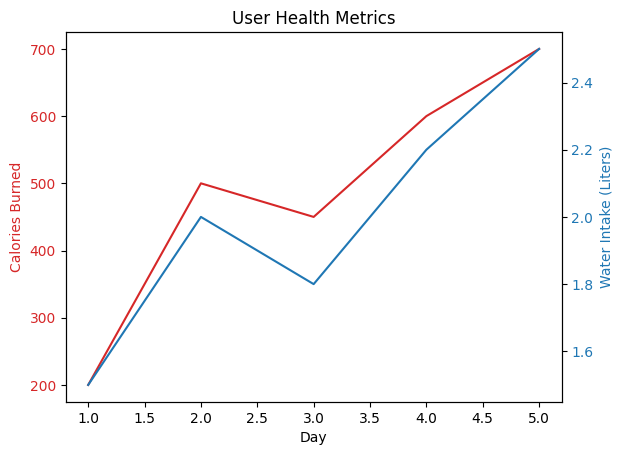

In [ ]:
import matplotlib.pyplot as plt

# Example data (You can store this in a file or DB)
days = [1, 2, 3, 4, 5]
calories_burned = [200, 500, 450, 600, 700]
water_intake = [1.5, 2, 1.8, 2.2, 2.5]

def visualize_health_data(days, calories, water):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Calories Burned', color=color)
    ax1.plot(days, calories, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Water Intake (Liters)', color=color)
    ax2.plot(days, water, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('User Health Metrics')
    plt.show()

visualize_health_data(days, calories_burned, water_intake)


Enter the number of days to track: 2
Enter calories burned on day 1: 10
Enter water intake in liters on day 1: .5
Enter calories burned on day 2: 1
Enter water intake in liters on day 2: .2


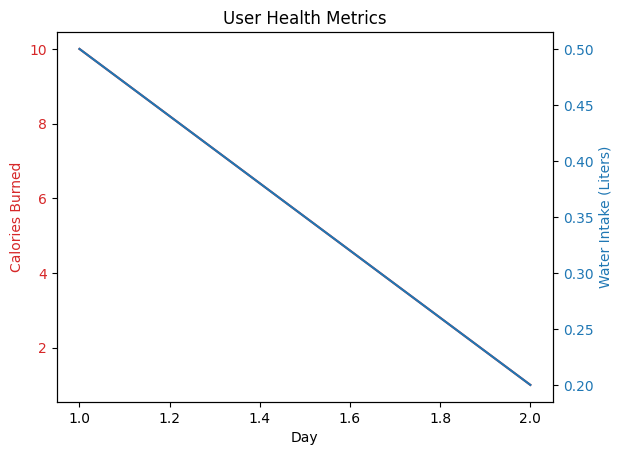

In [ ]:
def gather_user_data():
    days = []
    calories_burned = []
    water_intake = []

    num_days = int(input("Enter the number of days to track: "))

    for i in range(1, num_days + 1):
        days.append(i)
        calories = int(input(f"Enter calories burned on day {i}: "))
        water = float(input(f"Enter water intake in liters on day {i}: "))
        calories_burned.append(calories)
        water_intake.append(water)

    return days, calories_burned, water_intake

def visualize_health_data(days, calories, water):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Day')
    ax1.set_ylabel('Calories Burned', color=color)
    ax1.plot(days, calories, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Water Intake (Liters)', color=color)
    ax2.plot(days, water, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('User Health Metrics')
    plt.show()

# Gather user data and visualize
days, calories_burned, water_intake = gather_user_data()
visualize_health_data(days, calories_burned, water_intake)
